# Assignment 3 #
### Due: Monday, October 9th to be submitted via Canvas by 11:59 pm ###
### Total points: **90** ###

Your homework should be written in a python notebook. If you prefer, you can work in groups of two. **Please note that only one student per team needs to submit the assignment on Canvas but make sure to include both students' names, UT EIDs and the homework group.**  

For any question that requires a handwritten solution, you may upload scanned images of your solution in the notebook or attach them to the assignment . You may write your solution using markdown as well.

Please make sure your code runs and the graphs and figures are displayed in your notebook before submitting. (%matplotlib inline)

1. Homework Group - 62
2. Student Names - Udit Dhand (umd84), Sanyam Jain (sj33448)

## Q1. (30 points) - Comparing MLPs

In this problem, we will be comparing different MLP configurations on the California Housing dataset and the Diabetes dataset.

In [59]:
import numpy as np
from copy import deepcopy
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing, load_diabetes
import warnings
warnings.filterwarnings("ignore")

In [60]:
seed = 42

In [61]:
# Load the Calinifornia Housing dataset and do train/val/test split
california_housing = fetch_california_housing()
housing_X, housing_y = california_housing['data'], california_housing['target']
housing_X_train, housing_X_tmp, housing_y_train, housing_y_tmp = train_test_split(housing_X, housing_y, test_size=0.4, random_state=seed)
housing_X_val, housing_X_test, housing_y_val, housing_y_test = train_test_split(housing_X_tmp, housing_y_tmp, test_size=0.5, random_state=seed)

housing_scaler = StandardScaler()
housing_X_train = housing_scaler.fit_transform(housing_X_train)
housing_X_val = housing_scaler.transform(housing_X_val)
housing_X_test = housing_scaler.transform(housing_X_test)
print(california_housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [62]:
# Load the Diabetes dataset and do train/val/test split
diabetes = load_diabetes()
diabetes_X, diabetes_y = diabetes['data'], diabetes['target']

diabetes_X_train, diabetes_X_tmp, diabetes_y_train, diabetes_y_tmp = train_test_split(diabetes_X, diabetes_y, test_size=0.4, random_state=seed)
diabetes_X_val, diabetes_X_test, diabetes_y_val, diabetes_y_test = train_test_split(diabetes_X_tmp, diabetes_y_tmp, test_size=0.5, random_state=seed)

diabetes_scaler = StandardScaler()
diabetes_X_train = diabetes_scaler.fit_transform(diabetes_X_train)
diabetes_X_val = diabetes_scaler.transform(diabetes_X_val)
diabetes_X_test = diabetes_scaler.transform(diabetes_X_test)
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

**Part 1** **(10 pts)**. Write the training and evaluation functions of the MLP. Use the default parameter values of sklearn.neural_network.MLPRegressor except:

*   **hidden_layer_size**: given by train_mlp parameter
*   **learning_rate_init**: given by a list of search space
*   **random_state**: given by train_mlp parameter
*   **max_iter**: fix at 300



In [63]:
def train_mlp(hidden_layer_size, X_train, y_train, X_val, y_val, seed):
    learning_rate_list = [1e-1, 1e-2, 1e-3, 1e-4]
    best_r2 = -np.inf # Determine the best model based on the R2 score on validation set # TO HIDE
    for lr in learning_rate_list:
        # Initialize MLPRegressor
        model = MLPRegressor(hidden_layer_sizes=hidden_layer_size, learning_rate_init=lr,random_state=seed, max_iter=300)

        # Fit the MLPRegressor to training data
        model.fit(X_train,y_train)

        # Predict and evaluate on train and validation data
        mse_train, r2_train = eval_model(model, X_train, y_train)
        mse_val, r2_val = eval_model(model, X_val, y_val)
        print(f"Learning rate: {lr} MSE train: {mse_train} R2 train: {r2_train} MSE val: {mse_val} R2 val: {r2_val}")

        # Record the best model according to R2 score on validation set
        if r2_val > best_r2:
            best_lr = lr
            best_model = model
            best_r2 = r2_val

    return best_model, best_lr, best_r2

def eval_model(model, X, y):
    # Predict and evaluate
    y_pred = model.predict(X)
    mse = mean_squared_error(y_true = y,y_pred=y_pred)
    r2 = r2_score(y_true = y,y_pred=y_pred)
    
    return mse, r2



**Part 2** **(5 pts)**.
Train two MLPs on the **housing dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)



In [64]:
### START CODE ###

X_train = housing_X_train  
y_train = housing_y_train
X_val = housing_X_val
y_val = housing_y_val

best_model, best_lr, best_r2 = train_mlp(8, X_train, y_train, X_val, y_val, seed)
mse_test , r2_test = eval_model(best_model, housing_X_test, housing_y_test)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.35027525330051684 R2 train: 0.7359828150756125 MSE val: 0.37267740826728113 R2 val: 0.7144970949866237
Learning rate: 0.01 MSE train: 0.334521824008715 R2 train: 0.7478568370492932 MSE val: 0.3535165128445652 R2 val: 0.7291759866620737
Learning rate: 0.001 MSE train: 0.3343894234574139 R2 train: 0.7479566329112834 MSE val: 0.35499042645054313 R2 val: 0.7280468422414288
Learning rate: 0.0001 MSE train: 0.4331418308870668 R2 train: 0.673522791615294 MSE val: 0.4592155463352194 R2 val: 0.6482014482295081
Test MSE: 0.3500084220134057 Test R2: 0.7447291587040575


In [65]:
### START CODE ###

X_train = housing_X_train  
y_train = housing_y_train
X_val = housing_X_val
y_val = housing_y_val

best_model, best_lr, best_r2 = train_mlp((64,64), X_train, y_train, X_val, y_val, seed)
mse_test , r2_test = eval_model(best_model, housing_X_test, housing_y_test)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 0.3025951856390819 R2 train: 0.7719212866700539 MSE val: 0.33016673859704443 R2 val: 0.7470639193115693
Learning rate: 0.01 MSE train: 0.1685481339945936 R2 train: 0.8729581851923383 MSE val: 0.309770966800596 R2 val: 0.7626888323562035
Learning rate: 0.001 MSE train: 0.20584124261738032 R2 train: 0.8448488013209627 MSE val: 0.28680314360190845 R2 val: 0.780284157695474
Learning rate: 0.0001 MSE train: 0.26741512902207076 R2 train: 0.7984379744062986 MSE val: 0.31262030057434054 R2 val: 0.760505997948454
Test MSE: 0.27145967197808085 Test R2: 0.8020169387778012


**Part 3** **(5 pts)**. Train a **linear regression model** on the **housing dataset** and show their MSE and R2 scores on the test set. How do the performances of the two MLPs and the linear regression model compare, and what do you think causes the difference?

In [66]:
### START CODE ###
X_train = housing_X_train
y_train = housing_y_train
X_test = housing_X_test
y_test = housing_y_test

model = LinearRegression()
model.fit(X_train, y_train)

mse_test , r2_test = eval_model(model, housing_X_test, housing_y_test)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 0.5546246533101034 Test R2: 0.5954968710766684


#### Answer

1. **Linear Regression**:
   - Test MSE: 0.55
   - Test $R^2$: 0.59

2. **MLP with 1 layer (8 neurons)**:
   - Test MSE: 0.35
   - Test $R^2$: 0.74

3. **MLP with 2 layers (64 neurons each)**:
   - Test MSE: 0.27
   - Test $R^2$: 0.80

**Comparison**:

   - The MSE of Linear regression model is almost double that of the MLP model. Dataset size is good enough to give difference between modeling results. We think that the difference is caused by the fact that the relation between predictors and target variable is non linear and hence Linear regression model performs relatively poorly compared to MLP model which captures the non linear relationship well.

   - R2 for MLP model is 0.8 which is greater than Linear regression's R2 of 0.5. This is consistent with the fact that dataset's has non linear relationship with the target variable and MLP being a more complex model is able to explain the variance  in target variable by capturing more complex data patterns.

   - The MLP configured with (64, 64) outperforms the MLP set up with (8). This suggests that the enhanced capacity of the larger network grants it a superior capability to recognize data patterns. Notably, the R2 score for the more extensive network is elevated, indicating it explains a larger portion of the variance in the outcome variable, marking it as a more proficient model.

**Part 4** **(5 pts)**. Now, train two MLPs on the **diabetes dataset** with the following two different hidden layer size configurations and show their **MSE** and **R2 score** on the **test set**.
*   (8)
*   (64, 64)

In [67]:
### START CODE ###

X_train = diabetes_X_train  
y_train = diabetes_y_train
X_val = diabetes_X_val
y_val = diabetes_y_val
X_test = diabetes_X_test
y_test = diabetes_y_test

best_model, best_lr, best_r2 = train_mlp(8, X_train, y_train, X_val, y_val, seed)
mse_test , r2_test = eval_model(best_model, X_test, y_test)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 2476.346759502432 R2 train: 0.585898539459291 MSE val: 2517.632414913162 R2 val: 0.5632838571464869
Learning rate: 0.01 MSE train: 2923.5109570774443 R2 train: 0.511122522487204 MSE val: 2897.769455293564 R2 val: 0.4973441349506217
Learning rate: 0.001 MSE train: 23187.857938274905 R2 train: -2.8775368603787332 MSE val: 21269.44841782192 R2 val: -2.689462932964871
Learning rate: 0.0001 MSE train: 28400.91006149956 R2 train: -3.7492776575100377 MSE val: 26368.757515117697 R2 val: -3.5740045312528217
Test MSE: 3031.3140854025273 Test R2: 0.4759604846674894


In [68]:
### START CODE ###

X_train = diabetes_X_train  
y_train = diabetes_y_train
X_val = diabetes_X_val
y_val = diabetes_y_val
X_test = diabetes_X_test
y_test = diabetes_y_test

best_model, best_lr, best_r2 = train_mlp((64,64), X_train, y_train, X_val, y_val, seed)
mse_test , r2_test = eval_model(best_model, X_test, y_test)

### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Learning rate: 0.1 MSE train: 1206.425309814794 R2 train: 0.7982582685924149 MSE val: 3723.5437400131646 R2 val: 0.3541028268255031
Learning rate: 0.01 MSE train: 2243.7063917974406 R2 train: 0.6248012963844647 MSE val: 2647.383790966997 R2 val: 0.5407767905292495
Learning rate: 0.001 MSE train: 2708.36400051836 R2 train: 0.5470999834789378 MSE val: 2934.4456382474004 R2 val: 0.49098217318872495
Learning rate: 0.0001 MSE train: 25172.631134438427 R2 train: -3.2094360486565927 MSE val: 23365.034950969693 R2 val: -3.0529697190830607
Test MSE: 3048.801456733654 Test R2: 0.47293734904425155


**Part 5** **(5 pts)**. Train another linear regression model on the **diabetes dataset** and show its **MSE** and **R2 score** on the **test set**. How do the performances of two MLPs and the linear regression model compare? Is the performance order on the diabetes dataset the same as the one on the housing dataset? If not, what causes the difference?

In [69]:
### START CODE ###

X_train = diabetes_X_train  
y_train = diabetes_y_train
X_test = diabetes_X_test
y_test = diabetes_y_test

model = LinearRegression()
model.fit(X_train, y_train)

mse_test , r2_test = eval_model(model, X_test, y_test)
### END CODE ###
print(f"Test MSE: {mse_test} Test R2: {r2_test}")

Test MSE: 3245.611400975237 Test R2: 0.4389137589815668


#### Answer

1. **Linear Regression**:
   - Test MSE: 3245.6
   - Test $R^2$: 0.439

2. **MLP with 1 layer (8 neurons)**:
   - Test MSE: 3031.3
   - Test $R^2$: 0.476

3. **MLP with 2 layers (64 neurons each)**:
   - Test MSE: 3048.8
   - Test $R^2$: 0.473

**Comparison**:

   - There is not much difference in both the MSE and R2 for the MLP and Linear regression models. This relative indifference is caused by the size of the dataset being too small for any one technique to outperform the other since there are only 442 rows in the dataset.
   - Small size of the dataset will hinder the performance of MLP to capture non linear relationships in data if any and hence we see that the performance of a simpler Linear regression model is comparable to an inherently more complex MLP model.

**Comparison: California Housing and Diabetes**
- Results for California: MLP (64, 64) outperforms MLP (8,) which, in turn, is better than Linear Regression.

- Results for Diabetes: MLP (8,) has the best performance, followed by MLP (64, 64) and then Linear Regression.

**Potential Explanations**

- The California housing dataset might have complex non-linear patterns, which are more effectively identified by the comprehensive MLP (64,64) model. On the other hand, the diabetes dataset might have more straightforward relationships or not enough data, causing a detailed model like MLP (64,64) to struggle during training.

- The intricate architecture of the MLP model (64,64) might lead it to overfit on the diabetes dataset, especially if the data is limited.

- The significance of individual features in predicting outcomes may vary between the two datasets.
   


### Q2. (20 points) Tensorflow Playground
In this question, you will be playing with [Tensorflow Playground](https://playground.tensorflow.org).


Select **Classification** as the Problem Type. Among the four datasets shown in DATA, please select the top left dataset.

Use the following settings as the DEFAULT settings for all subquestions:


*   Learning rate = 0.03
*   Activation = Tanh
*   Regularization = None
*   Ratio of training to test data = 50%
*   Noise = 0
*   Batch Size = 30
*   input as  𝑋1  with  𝑋2
*   One hidden layer with 4 neurons

a) **(4 pts)** Use the DEFAULT setting and run two experiments -

1.   Using Tanh as the activation function
2.   Using the Linear activation function.

Report the train, test losses for both at the end of 1000 epochs. What qualitative difference do you observe in the decision boundaries obtained? What do you think is the reason for this?

We will now study the effect of certain variations in the network structure or training process, keeping all other aspects the same as in the DEFAULT setting specified above, with Tanh as the activation.

b) **(4 pts)** Effect of number of hidden units: Keep other settings the same as in DEFAULT.


1.   Report the training loss and test loss at the end of 1000 epochs using 2 neurons and 8 neurons in the hidden layer.
2.   What do you observe in terms of the decision boundary obtained as the number of neurons increases? What do you think is the reason for this?

c) **(4 pts)** Effect of Learning rate and number of epochs: Keep other settings the same as in DEFAULT.

1.   For learning rate 10, 1, 0.1, 0.01 and 0.0001, report the train, test losses at the end of 100 epochs, 500 epochs and 1000 epochs respectively.
2.   What do you observe from the change of loss vs learning rate, and the change of loss vs epoch numbers? Also report your observations on the training and test loss curve (observe if you see noise for certain learning rates and reason why this is happening).



d) **(4 pts)** Effect of the number of layers:

1.   Change your activation to ReLU and use a single hidden layer with 4 neurons and then add another hidden layer with 3 neurons and train both your models for 1000 epochs.
2.   Comment on your final models and decision boundaries and observe your training and test loss curves as well.


e) **(4 pts)** Use the DEFAULT setting. Play around with any hyperparameters, network architectures or input features (such as  sin(𝑋1),𝑋21  etc.), and report the best train and test loss you obtain (test loss should be no greater than 0.06). Attach the screenshot showing your full network, output and the parameters. Briefly justify your results, and comment on what helps/what doesn't help with lowering the loss, etc.


## Answer
#### Part A
**Tanh Activation**
- Train Loss: 0.010 
- Test Loss: 0.012
- Decision Boundary: The decision boundary encloses the inner class of datapoints with a triangular shape. Ideally, a circular decision boundary would perfectly separate the inner circle class from the outer class in this dataset.

**Linear Activation**
- Train Loss: 0.496
- Test Loss: 0.510
- Decision Boundary: The decision boundary displays linear gradients and does not effectively differentiate between the inner circle and the outer points. It cuts data down  forming a line that passes through center of the datapoints, half of all points are classified as blue and other region of this split as orange.

**Analysis:** 

The activation functions are used to introduce non-linearities into neural net models. Without these non-linearities, no matter how many layers we add to our network, it will behave just like a single-layer perceptron because summing these layers would give another linear function.
- In the case of the Tanh activation function, the non-linearity it introduced allowed the neural network to capture and differentiate between the classes to a significant extent.
- On the other hand, with a linear activation function, the model remains linear, and the decision boundary is also linear. In a scenario like this dataset, where the distinction between classes is inherently non-linear (inner circle vs. outer points), a linear decision boundary is insufficient.

In conclusion, the choice of activation function plays a pivotal role in determining how well a neural network can model complex, non-linear relationships in the data. The Tanh function did a notably better job than the linear activation.

#### Part B

1. **2 Neurons**
   - Train Loss: 0.227
   - Test Loss: 0.297
   - Decision Boundary: The decision boundary appears in a V shape, which does not enclose inner points.

2. **8 Neurons**
   - Train Loss: 0.006
   - Test Loss: 0.007
   - Decision Boundary: The decision boundary is a well-defined circle, correctly distinguishing between the inner circle and outer points.

**Analysis:** 

Having more neurons means the model can detect and combine more features, providing it with a better understanding of the patterns in the dataset.

- 2 Neurons: With only two feature detectors, the model is limited in the complexity of the patterns it can recognize. As a result, it can't fully capture the circular nature of the data distribution and settles for a V-shaped approximation.
- 8 Neurons: With eight feature detectors, the model has greater capacity to recognize intricate patterns in the data. This allows it to capture the circular distinction between the inner and outer classes, resulting in a more accurate decision boundary.

#### Part C

| Learning Rate | Epochs | Train Loss | Test Loss | Observations |
|---------------|--------|------------|-----------|--------------|
| 10            | 100    | 0.376      | 0.444     | Curves are noisy and stabilize on an incorrect solution. |
| 10            | 500    | 0.72       | 0.756     | Curves are noisy and stabilize on a wrong solution. |
| 10            | 1000   | 0.72       | 0.754     | Curves remain noisy and stabilize on a wrong solution. |
| 1             | 100    | 0.095      | 0.066     | Noisy until it converges, with training loss reaching zero. |
| 1             | 500    | 0.0009     | 0.034     | Noisy until convergence with training loss at zero. |
| 1             | 1000   | 0          | 0.009     | Persistent noise until convergence, training loss reaches zero. |
| 0.1           | 100    | 0.042      | 0.036     | Both test and train curves remain tight throughout. |
| 0.1           | 500    | 0.009      | 0.016     | Both test and train remain tight throughout. |
| 0.1           | 1000   | 0.005      | 0.012     | Both test and train remain tight throughout. |
| 0.01          | 100    | 0.39       | 0.428     | Test loss > training loss for about 600 epochs, then tightly follow each other. |
| 0.01          | 500    | 0.097      | 0.094     | Test loss > training loss for about 600 epochs, then tightly follow each other. |
| 0.01          | 1000   | 0.041      | 0.033     | Test loss > training loss for about 600 epochs, then tightly follow each other. |
| 0.0001        | 100    | 0.605      | 0.589     | Big gap between test and training loss throughout. |
| 0.0001        | 500    | 0.57       | 0.561     | Big gap between test and training loss throughout. |
| 0.0001        | 1000   | 0.538      | 0.534     | Big gap between test and training loss throughout. |

**Analysis:**

- **Loss vs Learning Rate:** 
  - Extremely high learning rates (e.g., 10) are not good for the training process, causing the model to overshoot the optimal solution, leading to noisy curves and incorrect stabilization.
  - Moderate learning rates (e.g., 1) converge faster, but with noise.
  - Lower learning rates (e.g., 0.1) lead to stable and tight convergence. However, even lower rates (e.g., 0.01 and 0.0001) either converge slowly or show a noticeable gap between training and test losses, indicating suboptimal learning.

- **Loss vs Epoch Numbers:** 
  - For most learning rates, as the number of epochs increases, the test and training losses decrease, reflecting improved learning. 
  - For the extremely high learning rate of 10, the loss increases with epochs, which is counter-intuitive and indicative of unstable learning.

- **Observations on Curves:** 
  - Noisy curves, especially at high learning rates, suggest that the model frequently overshoots the optimal weights, making large adjustments that do not benefit learning.
  - The gap between test and train loss at low learning rates indicates slow learning, with the model not adapting quickly enough to represent the data's underlying patterns.

0.1 seems to be the best learning rate for this data, for a stable solution.

#### Part D

1. **Single Hidden Layer (4 neurons) with ReLU Activation**
   - Train Loss: 0.006
   - Test Loss: 0.007
   - Decision Boundary: Polygon-like but it seems to be a rougher approximation compared to a two-layer model.

2. **Two Hidden Layers (4 neurons in the first and 3 in the second) with ReLU Activation**
   - Train Loss: 0.002
   - Test Loss: 0.001
   - Decision Boundary: Polygon-like

**Analysis:**

- Depth: The addition of another layer, even with fewer neurons in the second layer, improves the model's performance, as indicated by the decrease in both training and test losses. This improvement suggests that the increased depth allows the model to better capture intricate patterns in the data.
  
- Decision Boundaries: Both models seem to produce polygon-like decision boundaries. This characteristic might be due to the ReLU (Rectified Linear Unit) activation function. The ReLU function can create piecewise linear decision boundaries, which could lead to a polygonal shape when multiple neurons are involved. Given the improvement in the loss values with the deeper model, we might expect that the two-layer model's decision boundary is a more accurate or smoother polygon than the single-layer model's boundary.
  
- Loss Curves: The two-layer model converges faster or to a better minimum, given its lower loss values.

In summary, adding depth to the model, even with a moderate increase in the number of neurons, can lead to improved performance. The choice of activation function, such as ReLU in this case, can influence the nature of the decision boundaries.

#### Part E

**Model Specifications:**
- Input Features: $x_1^2$ and $x_2^2$
- Hidden Layers: 1
- Neurons in Hidden Layer: 1
- Activation Function: Linear
- Learning Rate: 0.1
- Training Data: 90% (of the entire dataset)

**Spec Analysis:**

1. Input Features: The decision to use squared features is due to its better representation of the circular pattern of the data, effectively capturing the distance from the origin for each point. The selection of squared terms as inputs effectively captures the radial nature of the problem, turning a potentially nonlinear problem into a linear one.

2. Architecture: A single neuron in a single hidden layer is used because the problem's complexity is effectively addressed by the choice of input features. Given that the relationship in squared terms might inherently be linear for this dataset, the architecture doesn't need to be complex. The minimized architecture (only one neuron) suggests that once the right input features are chosen, the problem doesn't require a complex model.

3. Activation Function: The linear activation function used implies that no additional transformation is being applied to the weighted sum of inputs. This again means that the  choice of input features has made the problem linearly solvable.

4. Learning Rate: A learning rate of 0.1 is moderately aggressive. Given the simplicity of the model and the choice of features, this rate seems sufficient to rapidly converge to a solution.

5. High Training Data Percentage: Using 90% of the data for training gives the model more examples to learn from. Allocating more data to training is beneficial, especially for simpler models.

In conclusion, the hyperparameters and architecture have been carefully selected to simplify the problem using the nature of the dataset. The choice of squared input features is particularly pivotal in achieving perfect train and test losses. It demonstrates the power of feature engineering and how the right features can sometimes make complex problems much more easier.

From the first image below, the test loss goes below 0.06 in just 4th epoch, and goes to 0 at around 220 epochs.

<table>
    <tr>
        <td><img src='img2.png' width='750' height='400'/></td>
        <td><img src='img1.png' width='750' height='400'/></td>
    </tr>
</table>



# Q3. (10 points) - Principal Component Analysis

**Part 1.** (5 points) Briefly explain the main principle behind the Principal Component Analysis algorithm. In what sense is the selection of the eigenvectors to represent the data an optimal choice.  How do you reconstruct (a noisy version of) the original data from the eigenvectors and the scores?

**Part 2**. (5 points) Read this [article](https://erdem.pl/2020/04/t-sne-clearly-explained) on t-SNE, a dimensionality reduction technique for visualization and explain it in your own words in one or two paragraphs.

## Answer:

### Part 1: ###

In the PCA algorithm, the data's n features are first centered by subtracting the mean. Then, the covariance matrix of this data is computed, resulting in an nxn matrix. The eigenvectors of this matrix represent directions in n-dimensional space. When the covariance matrix acts on an eigenvector, the eigenvector's direction remains unchanged; it only gets scaled by a factor, which is the corresponding eigenvalue. This means that eigenvectors correspond to directions in which the data has maximum variance. Representing data along these eigenvectors is optimal as they capture the directions of highest variability in the data. This representation can reveal patterns, trends, or clusters in the data, providing valuable insights.

To reconstruct the data from the eigenvectors (often called principal components in this context) and their scores (projections of the data onto the eigenvectors), one would multiply the scores with the eigenvectors and then add back the mean. If PCA was used for dimensionality reduction and only a subset of the principal components is used for reconstruction, the reconstructed data is an approximation and can be thought of as a "denoised" version of the original data.

### Part 2: ###

**t-SNE Definition:**
t-SNE is a dimensionality reduction technique, similar in purpose to PCA. However, unlike PCA, which is linear, t-SNE is nonlinear, allowing it to better handle non-linear data. While PCA can establish a covariance matrix from one dataset and apply it to out-of-sample data, t-SNE is iterative, making its results specific to the dataset in question and not directly transferable.

**t-SNE Algorithm:**
In the context of classification data, t-SNE begins by constructing a probability distribution to express the similarity between data points. For instance, the probability that point $x_j$ would be chosen as a neighbor to $x_i$ is calculated. This involves centering a Gaussian around $x_i$, where the likelihood of including $x_j$ in the same cluster diminishes with increasing Euclidean distance from $x_i$.

The probabilities for every $x_j$ given one $x_i$ are normalized so their sum equals 1. The joint probability for both $i$ and $j$ being in the same cluster is derived by averaging the probabilities obtained when the Gaussian is centered first on $i$ and then on $j$.

**Perplexity parameter:**
A crucial step is choosing the variance for the Gaussian. As variance grows, more points will likely be considered as part of a cluster. This is where perplexity comes in. It's a user-specified parameter representing the desired number of effective neighbors. The algorithm then searches for a variance that aligns the Gaussian with the user-defined perplexity.

**Projecting to Low-Dimensional:**
The objective is to find a comparable probability distribution in a lower-dimensional space. Instead of a Gaussian distribution, which could cause data crowding in visual outputs, a Student's t-distribution with its "fat tails" is employed. With the high-dimensional probabilities in hand, the next step is to determine the corresponding points in the lower dimension that follow this t-distribution. The Kullback-Leibler divergence of the two probability distributions is minimized using gradient descent to fine-tune the points' placements in this reduced space.

**Initialization Tricks:**
Two tricks help optimize the algorithm's behavior:
- **Early Compression:** This avoids premature clustering by introducing L2 penalties to the cost function in the initial stages.
- **Early Exaggeration:** This is used to spatially separate clusters at the outset.






# Q4. (20 points) - Principal Component Analysis

In this problem we will be applying PCA and T-SNE on the Superconductivity Dataset. More details on the dataset is present [here](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data#). The goal here is to predict the critical temperature of a superconductor based on the features extracted.

First use Principal Component Analysis (PCA) to solve this problem.  

* **Part 1. (5 points)** Perform the following steps to prepare the dataset:
    * Load the dataset from the "Q4data.csv" file provided as a dataframe df.

    * Select the **'critical_temp'** column as the target column and the rest of the columns from the dataframe df as X.

    * Split the dataset into train and test set with 35% data in test set and random_state = 42

    * Perform [Standard Scaling](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) on the dataset. Remember that when we have training and testing data, we fit preprocessing parameters on training data and apply them to all testing data. You should scale only the features (independent variables), not the target variable y.
    
    `Note: X should have 81 features.`
    




In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SequentialFeatureSelector
import os, sys, re
import time
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
df = pd.read_csv("Q4data.csv")


In [71]:
y = df["critical_temp"]
X = df.drop(columns=["critical_temp"])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.35, random_state=42)

scalar = StandardScaler()

### START CODE ###
### Scale the dataset

scalar.fit(X_train)
X_train_scaled = scalar.transform(X_train)
X_test_scaled = scalar.transform(X_test)

### END CODE ###

* **Part 2 (5 points)** Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) and reduce the dimension of X_train to the following number of components: `[3,20,40,60,81]`. For each of the five datasets, print the cumulative variance explained by the principal components`N = [3,20,40,60,81]`.(i.e. what percentage of variance in the original dataset is explained if we transform the dataset to have 3,20,40,60 and 81 principal components respectively).

  `Note : PCA should be fit on X_train and the components thus learnt should be later used to transform X_test`

In [72]:
from sklearn.decomposition import PCA
nums = [3,20,40,60,81]
res = []
for num in nums:
    ### START CODE ###
    ## Fit PCA
    pca = PCA(n_components=num)
    pca.fit(X_train_scaled)
    ### END CODE ###

    ### START CODE ###
    ## Transform Data
    X_train_pca = pca.transform(X_train_scaled)
    ### END CODE ###

    ### START CODE ###
    ## Compute explained variance
    explained_variances = pca.explained_variance_ratio_
    res.append(sum(explained_variances))
    ### END CODE ###

    print("Cumulative variance explained by {} components is {}".format(num,res[-1])) #cumulative sum of variance explained with [n] features


Cumulative variance explained by 3 components is 0.5894367932307202
Cumulative variance explained by 20 components is 0.969425023422374
Cumulative variance explained by 40 components is 0.9961465168057957
Cumulative variance explained by 60 components is 0.9995333372534644
Cumulative variance explained by 81 components is 1.0000000000000007


* **Part 3. (5 points)** Plot the cumulative variance explained by the principal components using the training data. The plot should display the number of components on X-axis and the cumulative explained variance on the y-axis. What do you understand from the plot obtained?

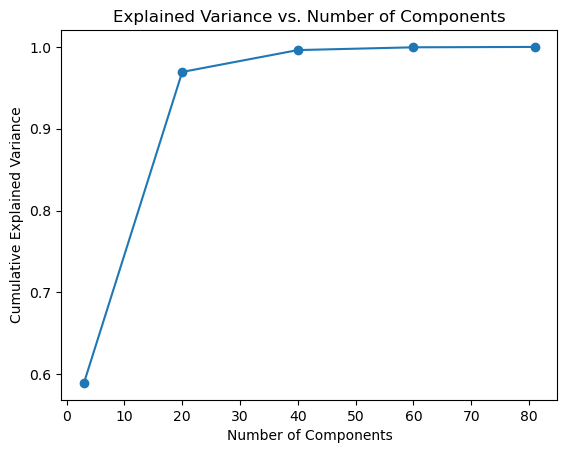

In [73]:
### START CODE ###
## Plot the explained variance vs number of components
plt.plot(nums, res, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')

### END CODE ###
plt.show()

* **Part 4. (5 points)** For each of the reduced dataset, obtained in part 2.2, fit a linear regression model on the train data and show how adjusted $R^2$ varies as a function of # of components.(There will be a total of 5 ${R^2}$ score).


In [74]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

nums = [3,20,40,60,81]
res = []

for num in nums:
    ### Fit PCA components ###
    pca = PCA(n_components=num)
    pca.fit(X_train_scaled)

    ### Transform train and test data ###
    X_train_new = pca.transform(X_train_scaled)
    X_test_new = pca.transform(X_test_scaled)

    ### Compute explained variance ###
    explained_variances = pca.explained_variance_ratio_
    res.append(sum(explained_variances))

    ### Fit LR and compute R-square and adjusted R-squared ###
    lr = LinearRegression()
    lr.fit(X=X_train_new, y=Y_train)  
    r_squared = lr.score(X=X_test_new, y=Y_test)  

    adjusted_r_squared = 1 - (1-r_squared)*(len(Y_test)-1)/(len(Y_test)-X_test_new.shape[1]-1)
    print("Adjusted R^2", adjusted_r_squared)


Adjusted R^2 0.4927514883327917
Adjusted R^2 0.6240102763667932
Adjusted R^2 0.6882697881912538
Adjusted R^2 0.7155821654072689
Adjusted R^2 0.7277522695494444


# Q5. (10 points) PCA vs T-SNE
* **Part 1.** **(3 points)** Now apply T-SNE to the dataset given above in Q4. You are required to carry out the following tasks:



1.   Initialize a t-SNE model with number of dimensions = 3, perplexity = 300, number of iterations = 300 and random state = 42
2.   Apply the t-SNE model to the training dataset











In [75]:
from sklearn.manifold import TSNE

### START CODE ###
## Initialize t-SNE model
tsne = TSNE(n_components=3, perplexity=300, random_state=42, n_iter=300)
### END CODE ###

### START CODE ###
## Fit and transform the data
X_tsne = tsne.fit_transform(X_train_scaled)
### END CODE ###

* **Part 2.** (3 points) For this part use a small subset of 500 samples of the training dataset and plot the first three t-SNE components similar to the PCA implementation above

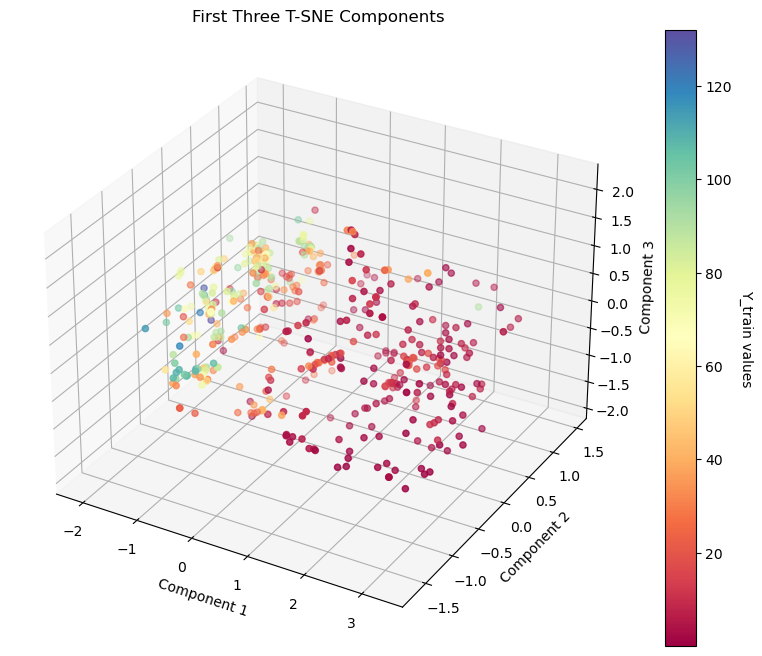

In [76]:

np.random.seed(42)
random_idx = np.random.choice(X_train_scaled.shape[0], 500, replace=False)
X_subset = X_train_scaled[random_idx]
Y_subset = Y_train.iloc[random_idx]

X_tsne_subset = tsne.fit_transform(X_subset)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc =  ax.scatter(X_tsne_subset[:, 0], X_tsne_subset[:, 1], X_tsne_subset[:, 2],c=Y_subset, cmap=plt.cm.Spectral)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('Y_train values', rotation=270, labelpad=15)

ax.set_title("First Three T-SNE Components")
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
plt.show()


* **Part 3. (4 points)** Now we will plot the PCA and t-SNE projections of the data and compare the plots side-by-side to see the difference in scatters created by the two methods. You can use first 1000 data points for this.

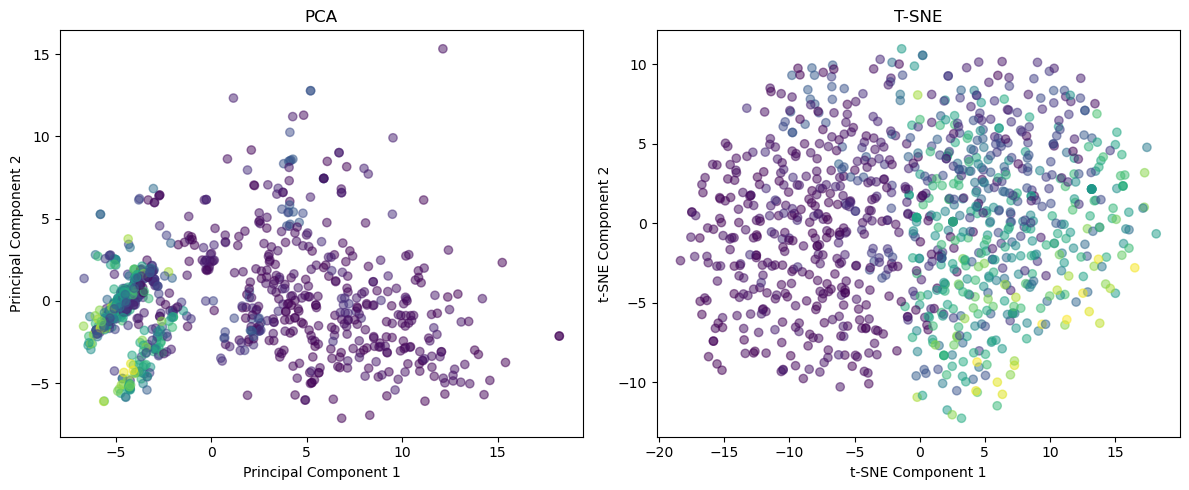

In [77]:
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

X_subset = X_train_scaled[:1000]
Y_subset = Y_train[:1000]

# First subplot (left)

### START CODE ###
### Obtain components from PCA
pca = PCA(n_components=2)
X_pca_subset = pca.fit_transform(X_subset)
### END CODE ###

plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
plt.title('PCA')

### START CODE ###
### scatter plot for PCA
plt.subplot(1, 2, 1)  # 1 row, 2 columns, select the first subplot
plt.scatter(X_pca_subset[:, 0], X_pca_subset[:, 1], alpha=0.5, c=Y_subset)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
### END CODE ###


# Second subplot (right)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot

### START CODE ###
### scatter plot for t-SNE
X_tsne_subset = tsne.fit_transform(X_subset)
plt.subplot(1, 2, 2)  # 1 row, 2 columns, select the second subplot
plt.scatter(X_tsne_subset[:, 0], X_tsne_subset[:, 1], alpha=0.5, c=Y_subset)
plt.title('T-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
### END CODE ###

plt.title('T-SNE')
plt.tight_layout()

# Show the plots
plt.show()